# TAREA FINAL: IMPORTACIÓN DE DATASET (.CSV), SIMULACIÓN DE LOGS Y GRÁFICO DE DATOS

### GRUPO 9:

* Jonathan Diego Álvarez Wagnio
* Juan Carlos Arias Giraldo
* María Fernanda Pacheco Tulcanaza 
* Jairo Joel Siza Hilaño

En esta tarea final, el objetivo es importar un conjunto de datos (dataset) al cual se le realizará un preprocesamiento para limpiarlo y transformarlo adecuadamente. Posteriormente, se generarán diversas visualizaciones para explorar y mostrar los resultados de manera clara y concisa. Finalmente, se presentarán y guardarán los 10 primeros registros de nuestro dataset preprocesado en una base de datos Postgres levantada sobre un devcontainer.

Lo primero que haremos es importar las bibliotecas necesarias para llevar a cabo el análisis de datos y la creación de gráficos. Para el manejo y manipulación de los datos, utilizaremos pandas y numpy, mientras que para la generación de gráficos y visualizaciones emplearemos matplotlib, seaborn y plotly.express. Estas herramientas nos permitirán crear gráficos estadísticos e interactivos, facilitando un análisis detallado de los resultados y la identificación de patrones o tendencias en los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Se procederá a leer el dataset que hemos escogido para trabajar: **"Phishing_Email_1500m.csv"**

***Nota importante:*** El dataset original **"Phishing_Email.csv"** no pudo ser cargado a github por superar el tamaño permitido (25MB) ya que el peso es de 49,6 MB. [GitHub muestra el siguiente mensaje: Yowza, that’s a big file. Try again with a file smaller than 25MB.]

Por esta razón, se ha tomado solo las primeras 1500 muestras para reducir el tamaño del .csv a 2,35 MB **"Phishing_Email_1500m.csv"**

In [2]:
df = pd.read_csv("/workspaces/Entrega_final_practica_grupo_9/Clase3/Phishing_Email_1500m.csv", encoding="latin1", sep=";")
df.head()

,Column1,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
print("Dimension of the DataFrame:",df.shape)

Dimension of the DataFrame: (1501, 3)


## Preprocesamiento del DataFrame

Ejecutaremos el siguiente código para conocer cúantos elementos vacíos hay en cada columna.

In [4]:
df.isnull().sum()

Column1       0
Email Text    2
Email Type    0
dtype: int64

Como se observa en el resultado, en el archivo .csv hay una columna que no tiene nombre y se le ha asignado por defecto "Column1" al cargar/leer la data. Esta columna contiene índices que no son útiles para nuestro análisis, por lo cual esta columna será eliminada. 

Además, existen 2 filas que tienen elementos vacíos o nulos (null values) en la columna "Email Text", lo siguiente que haremos en removerlos o eliminarlos.

In [5]:
#Eliminación de la columna denominada "Column1"
#axis=1 indica que la operación se realizará a lo largo de las columnas del DataFrame

df.drop(["Column1"],axis=1,inplace=True)
print("Dimension of the row data:",df.shape)

Dimension of the row data: (1501, 2)


In [6]:
#Eliminación de filas que tienen elementos vacíos o nulos (null values)
#axis=0 se usa para operaciones a lo largo de las filas del DataFrame
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)
print("Dimension of the row data:",df.shape)

Dimension of the row data: (1448, 2)


Como parte del proceso general de limpieza de datos hemos: 

* **Eliminado muestras duplicadas o irrelevantes** y 

* **Tratado las muestras incompletas.**

In [7]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


Para asegurar que los valores en la columna Email Type siempre sean consistentes y se cuenten correctamente (sin importar como están escritos), es necesario normalizar esos valores convirtiendo todos los valores a minúsculas (o mayúsculas) para evitar diferencias de capitalización. En nuestro caso los convertiremos a minúsculas (**Lowercasing**).

In [8]:
#Comprobar si todos los valores de la columna 'Email Type' están en minúsculas
all_lowercase = df['Email Type'].apply(lambda x: x.islower()).all()
# Mostrar el resultado
print(all_lowercase)
print(df['Email Type'])
print(f"{'=' * 50}")

# Convertir todos los valores a minúsculas
df['Email Type'] = df['Email Type'].str.lower()  
# Mostrar el resultado
print(df['Email Type'])

False
0           Safe Email
1           Safe Email
2           Safe Email
3       Phishing Email
4       Phishing Email
             ...      
1496        Safe Email
1497    Phishing Email
1498        Safe Email
1499    Phishing Email
1500        Safe Email
Name: Email Type, Length: 1448, dtype: object
0           safe email
1           safe email
2           safe email
3       phishing email
4       phishing email
             ...      
1496        safe email
1497    phishing email
1498        safe email
1499    phishing email
1500        safe email
Name: Email Type, Length: 1448, dtype: object


* **Eliminar espacios innecesarios.**

A veces, los datos tienen espacios extra alrededor del texto. Eliminaremos los espacios antes y después de las cadenas en la columna "Email Type" para evitar que se cuenten como distintos:

In [9]:
# Eliminar espacios en blanco
df['Email Type'] = df['Email Type'].str.strip()  
print(df['Email Type'])

0           safe email
1           safe email
2           safe email
3       phishing email
4       phishing email
             ...      
1496        safe email
1497    phishing email
1498        safe email
1499    phishing email
1500        safe email
Name: Email Type, Length: 1448, dtype: object


Después de hacer las correcciones, ya tenemos los datos limpios y procedemos a verificar si ahora todas las filas tienen las dos únicas categorías correctas:

In [10]:
# Verificar los valores únicos en la columna
print(df['Email Type'].unique())  

['safe email' 'phishing email']


Finalmente, podemos contar la frecuencia de los valores únicos en la columna Email Type:

In [11]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
safe email        869
phishing email    579
Name: count, dtype: int64


Si sumamos la fecuencia de "safe email" y la de "phishing email" es igual al Length del DataFrame: 1448

## Modificación del DataFrame para generar distintas gráficas.

Como nuestro dataFrame únicamente tiene 2 columnas de información, procederemos a crear adicionales con datos simulados, basándonos en el código visto en clase.

* Timestamp (fecha y horas aleatorias).

* IP_origen (direcciones IP aleatorias).

* Email_domain (dominios de correo).

* Priority_level (nivel de prioridad).

* Country (país de origen).

**1. Timestamp**

Como no tenemos una columna de tiempo real, generaremos una columna con fechas y horas aleatorias.

In [12]:
# Importamos librería requerida
from datetime import datetime, timedelta

# Generar una fecha aleatoria dentro de un rango
def generate_random_timestamp(start, end):
    return start + timedelta(seconds=np.random.randint(0, int((end - start).total_seconds())))

# Definir el rango de fechas
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)

# Aplicar la función a cada fila del DataFrame
df['Timestamp'] = [generate_random_timestamp(start_date, end_date) for _ in range(len(df))]
print(df['Timestamp'])

0      2023-03-31 03:15:02
1      2023-11-12 06:12:53
2      2023-03-29 03:47:34
3      2023-02-17 02:25:03
4      2023-09-10 22:04:07
               ...        
1496   2023-09-03 00:09:30
1497   2023-08-09 11:31:03
1498   2023-06-06 03:49:46
1499   2023-10-17 09:43:01
1500   2023-05-29 23:23:17
Name: Timestamp, Length: 1448, dtype: datetime64[ns]


**2. IP_origen**

Generaremos direcciones IP aleatorias dentro de un rango específico. 


In [13]:
# Generar IPs aleatorias dentro de un rango
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

# Aplicar la función a cada fila del DataFrame
df['IP_origen'] = [random_ip() for _ in range(len(df))]
print(df['IP_origen'])

0         187.10.67.51
1          23.25.27.50
2       229.110.195.86
3        70.238.172.97
4       147.221.182.52
             ...      
1496        3.168.88.5
1497      9.238.43.123
1498     94.74.173.194
1499      62.71.13.141
1500    93.154.175.111
Name: IP_origen, Length: 1448, dtype: object


**3. Email_domain**

Simularemos algunos dominios de las direcciones de correo y los agregaremos como una nueva columna. 

In [14]:
# Simular un dominio de correo electrónico aleatorio
dominios = ['gmail.com', 'yahoo.com', 'outlook.com', 'hotmail.com','microsoft.com', 'secureemail.com', 'google.com']

def random_email_domain():
    return np.random.choice(dominios)

df['Email_domain'] = [random_email_domain() for _ in range(len(df))]
print(df['Email_domain'])

0         microsoft.com
1       secureemail.com
2            google.com
3            google.com
4             gmail.com
             ...       
1496        hotmail.com
1497         google.com
1498        hotmail.com
1499        hotmail.com
1500         google.com
Name: Email_domain, Length: 1448, dtype: object


**4. Priority_level**

Agregaremos una columna que simule el nivel de prioridad de un correo, basándonos en si es phishing email o safe email, ya que este dato viene en el dataset en la columna "Email Type".

In [15]:
# Definir posibles niveles de prioridad para los correos seguros
safe_priority_options = ['Low', 'Medium']

# Asignar 'High' si se trata de phishing, o asignar un valor aleatorio entre 'Low' y 'Medium' si es un email seguro
df['Priority_level'] = df['Email Type'].apply(lambda x: 'High' if x == 'phishing email' else np.random.choice(safe_priority_options))
print(df['Priority_level']) 

0       Medium
1       Medium
2       Medium
3         High
4         High
         ...  
1496    Medium
1497      High
1498       Low
1499      High
1500       Low
Name: Priority_level, Length: 1448, dtype: object


**5. Country**

Simularemos la ubicación de origen de los correos mediante países.

In [16]:
# Definir países de origen para los correos
countries = ['USA', 'Canada', 'UK', 'Germany', 'India', 'Colombia', 'Brazil', 'Argentina', 'Spain']

def random_country():
    return np.random.choice(countries)

df['Country'] = [random_country() for _ in range(len(df))]
print(df['Country']) 

0       Argentina
1             USA
2             USA
3              UK
4             USA
          ...    
1496        Spain
1497          USA
1498           UK
1499          USA
1500          USA
Name: Country, Length: 1448, dtype: object


In [17]:
df.head()

,Email Text,Email Type,Timestamp,IP_origen,Email_domain,Priority_level,Country
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",safe email,2023-03-31 03:15:02,187.10.67.51,microsoft.com,Medium,Argentina
1,the other side of * galicismos * * galicismo *...,safe email,2023-11-12 06:12:53,23.25.27.50,secureemail.com,Medium,USA
2,re : equistar deal tickets are you still avail...,safe email,2023-03-29 03:47:34,229.110.195.86,google.com,Medium,USA
3,\nHello I am your hot lil horny toy.\n I am...,phishing email,2023-02-17 02:25:03,70.238.172.97,google.com,High,UK
4,software at incredibly low prices ( 86 % lower...,phishing email,2023-09-10 22:04:07,147.221.182.52,gmail.com,High,USA


***¡Listo!*** Ya tenemos nuestro DataFrame enriquecido con columnas de datos simulados. 

## Gráficas de Datos

A continuación, graficaremos 7 diferentes ilustraciones, basándonos en el código ejecutado en clase.

### 1. Distribución Categórica de Email por tipo

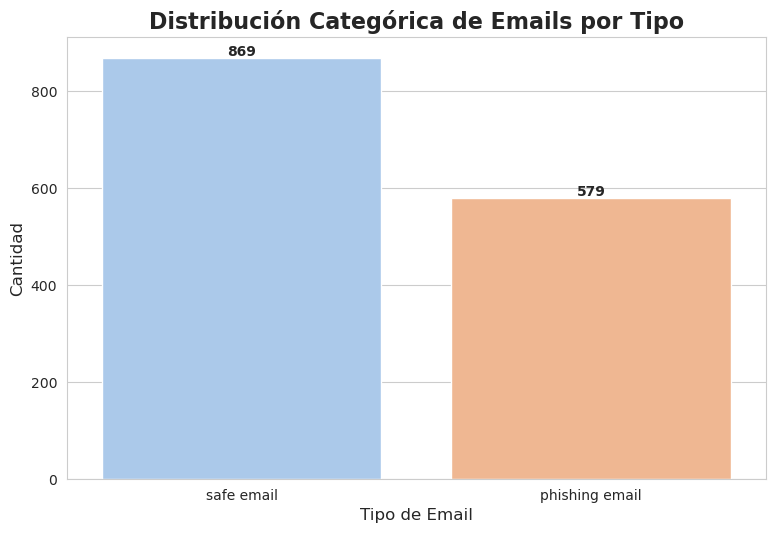

In [18]:
# Configuración del estilo del gráfico Email por tipo

# Definir tamaño
plt.figure(figsize=(15, 10))  

# Fondo con cuadrícula sutil
sns.set_style("whitegrid")  

# Posicionamiento en la cuadrícula
plt.subplot(2, 2, 1)  
email_type_count = df['Email Type'].value_counts()

# Gráfico de barras con 2 colores
palette = sns.color_palette("pastel")[:len(email_type_count)]  
sns.barplot(x=email_type_count.index, y=email_type_count.values, hue=email_type_count.index, palette=palette, legend=False)

# Rotación y alineación de etiquetas del eje X
plt.xticks(rotation=0, ha='center')

# Etiquetas y título con estilo
plt.xlabel('Tipo de Email', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución Categórica de Emails por Tipo', fontsize=16, fontweight='bold')

# Añadir valores sobre las barras
for i, v in enumerate(email_type_count.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10, fontweight='bold')

# Ajustar automáticamente los elementos del gráfico para evitar superposición
plt.tight_layout()

# Guardar figura
plt.savefig('1_distrib_email_by_type.png')  
# Mostrar figura
plt.show()

**Comentarios:** La gráfica de barras muestra la distribución de los diferentes tipos de emails ("safe email" y "phishing email") según la cantidad de cada uno. En el eje vertical se representan las cantidades de emails recibidos, mientras que en el eje horizontal se encuentran los distintos tipos de email. Esta visualización permite observar cuántos emails pertenecen a cada categoría, lo que facilita la comparación de la prevalencia de tipos de emails en los datos proporcionados.

Es importante aclarar que esta gráfica inicial utiliza datos provenientes del archivo **"Phishing_Email_1500m.csv"**, por lo que los resultados de esta gráfica serán constantes y no variarán entre ejecuciones. Sin embargo, las gráficas que se presentan a continuación pueden mostrar resultados diferentes en cada ejecución completa del archivo **grupo9.ipynb**, ya que estas se basan en columnas adicionales que contienen datos generados de manera aleatoria. Esto implica que, los resultados de dichas visualizaciones estarán sujetos a variaciones cada vez que se ejecute el código.

### 2. Gráfico pastel por nivel de riesgo de Seguridad

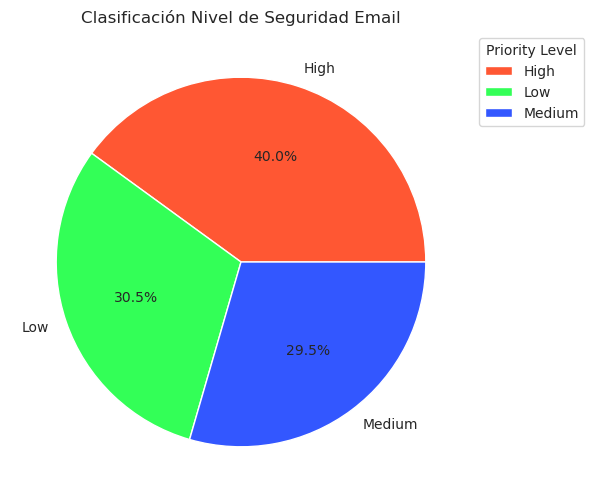

In [19]:
# Genera una gráfica Tipo Pie para chequear el porcentaje de Nivel de Seguridad que existe en los Email Generados
fig_pie = px.pie(df, 
                 names='Priority_level',
                 title="Clasificación Nivel de Seguridad Email",
                 color_discrete_sequence=["#FF5733", "#33FF57", "#3357FF", "#F4C724", "#A833FF"])

# Genera la gráfica tipo Pie con matplotlib para guardarla como imagen .png
counts = df['Priority_level'].value_counts()

# Ajusta el tamaño
plt.figure(figsize=(6,6))

# Crea el gráfico de pastel con matplotlib y añade título
wedges, texts, autotexts =plt.pie(x=counts, labels=counts.index, autopct='%1.1f%%', colors=["#FF5733", "#33FF57", "#3357FF", "#F4C724", "#A833FF"])
plt.title("Clasificación Nivel de Seguridad Email")

# Añade leyenda
plt.legend(wedges, counts.index, loc='upper left', title='Priority Level', bbox_to_anchor=(1, 1))

# Guarda la figura
plt.savefig('2_priority_level_pie_chart_plotly.png')  
# Muestra la figura
plt.show()

**Comentarios:** La gráfica de tipo "pie" o "pastel" muestra el porcentaje de emails clasificados según su nivel de seguridad. En esta visualización, cada porción del pastel representa un nivel de prioridad ("Low", "Medium", "High"), y el tamaño de cada porción es proporcional al número de emails en esa categoría. Se han usado los colores azul para "Low", verde para "Medium" y rojo para "High", la gráfica permite identificar rápidamente la distribución de los niveles de seguridad en los emails.

En este ejemplo, el 40% de los emails recibidos corresponde a un nivel "High", es decir de alta prioridad por el riesgo que representan.

### 3. Actividad por hora del día

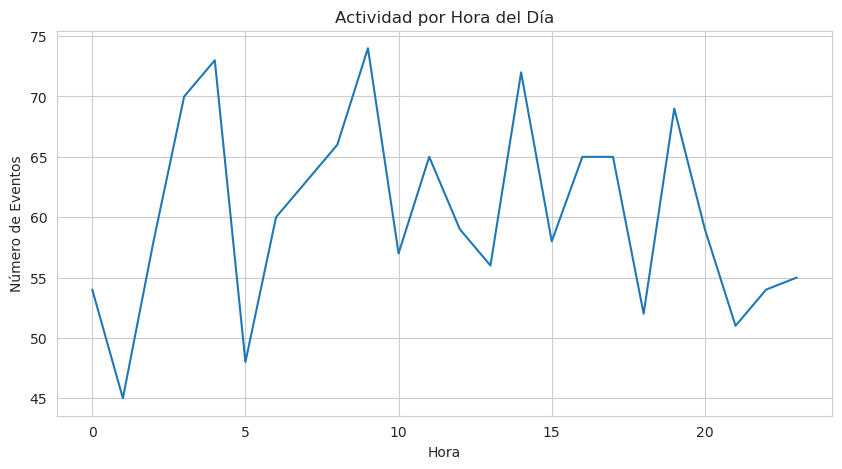

In [20]:
# Asegurar que 'Timestamp' es tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Agrupar por hora sin modificar el DataFrame
hourly_count = df.groupby(df['Timestamp'].dt.hour).size()

# Graficar
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_count.index, y=hourly_count.values)

# Etiquetas y título
plt.title('Actividad por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

# Guardar figura
plt.savefig('3_ActividadporHoraDia.png') 

# Mostrar gráfico
plt.show()

**Comentarios:** La gráfica permite observar cómo varía la cantidad de eventos a lo largo del día, proporcionando información sobre patrones de actividad. Hay mayor actividad registrada aproximadamente a las 15h00 con un pico que sobrepasa los 80 emails, esto indica que en este tiempo se han recibido la mayor cantidad de correos ya sean de tipo "safe email" o "phishing email".

### 4. Eventos por Hora y Nivel de Prioridad

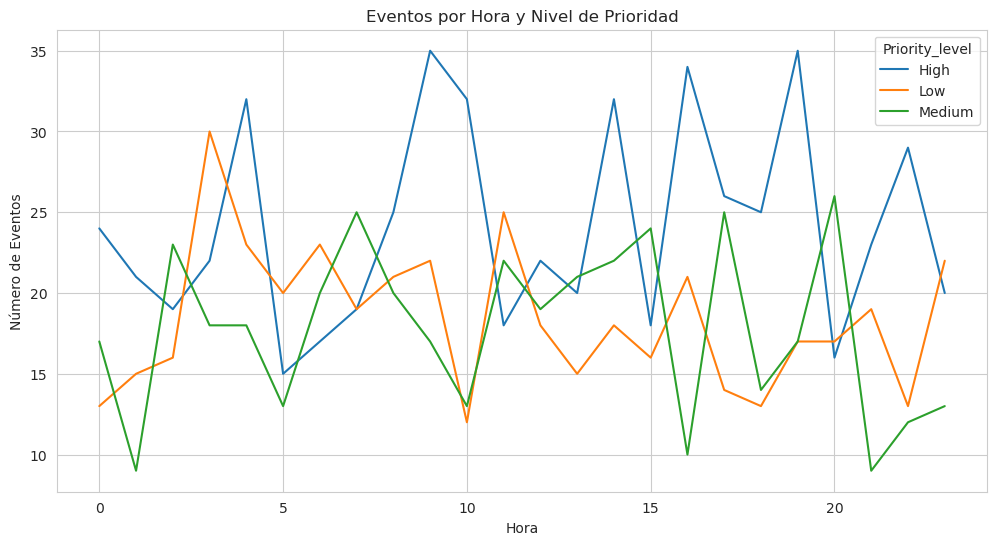

In [21]:
# Asegurar que 'Timestamp' es tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extraer la hora del Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Agrupar por hora y prioridad (Priority_level)
hourly_priority_count = df.groupby(['Hour', 'Priority_level']).size().reset_index(name='Event_Count')

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Event_Count', hue='Priority_level', data=hourly_priority_count)

# Etiquetas y título
plt.title('Eventos por Hora y Nivel de Prioridad')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

# Guardar figura
plt.savefig('4_Evento_Severidad_Dia.png')  

# Mostrar gráfico
plt.show()

**Comentarios:** La gráfica de "Eventos por Hora y Nivel de Prioridad" revela cómo varía la cantidad de eventos (emails) según la hora del día y su nivel de prioridad. Se pueden observar ciertos patrones en la distribución temporal de los eventos, lo que puede indicar que los emails con un nivel de prioridad "High" (alto) tienden a concentrarse en determinadas horas del día (alrededor de las 15h00). Las fluctuaciones en el número de eventos por hora sugieren momentos de mayor o menor actividad, lo que podría correlacionarse con la hora en que se generan más comunicaciones de alto riesgo (phishing, spam, etc.). La identificación de estos patrones es útil para priorizar la respuesta o análisis de los emails según su gravedad en distintos momentos del día.

### 5. Mapa de Calor de Actividad por Hora y Tipo de Evento

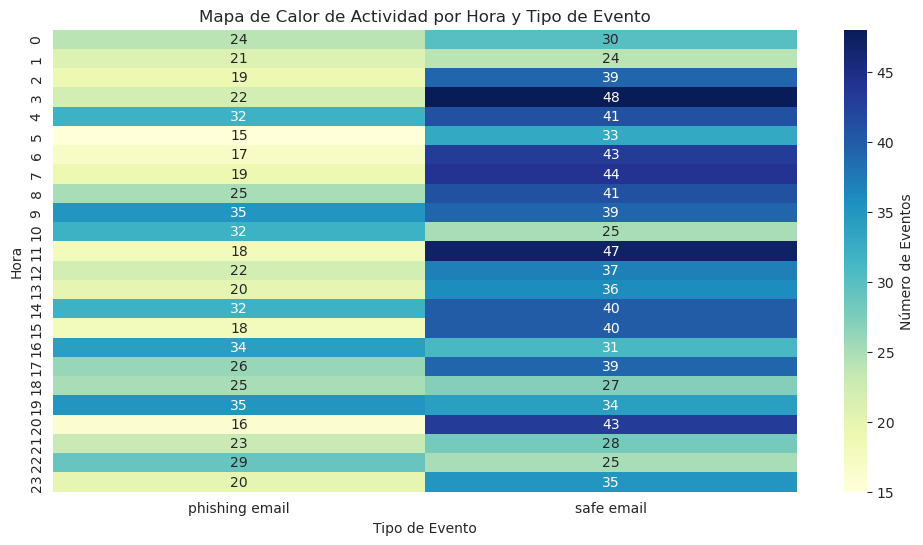

In [22]:
# Asegurar que 'Timestamp' es tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extraer la hora del Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Agrupar por hora y tipo de evento (Email Type)
heatmap_data = df.groupby(['Hour', 'Email Type']).size().unstack(fill_value=0)

# Graficar mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Número de Eventos'})

# Etiquetas y título
plt.title('Mapa de Calor de Actividad por Hora y Tipo de Evento')
plt.xlabel('Tipo de Evento')
plt.ylabel('Hora')

# Guardar figura
plt.savefig('5_MapaDeCalor.png') 


# Mostrar gráfico
plt.show()

**Comentarios:** El Mapa de Calor de Actividad por Hora y Tipo de Evento permite identificar claramente las horas del día en las que ocurren con mayor frecuencia los distintos tipos de eventos ("safe email" o "phishing email"). Las celdas más oscuras, es decir las de color más intenso, indican los períodos con mayor número de eventos de acuerdo con los tipos de email que se encuentran diferenciados en el eje horizontal: "safe email" y "phishing email". Se puede observar que ciertos tipos de eventos, como los correos de phishing, tienden a concentrarse en horas específicas del día (alrededor de las 15h00), mientras que otros tipos de correos, como los seguros, tienen una distribución más uniforme. Este tipo de visualización ayuda a comprender las variaciones horarias en la actividad de los emails y a identificar posibles picos de actividad o amenazas en momentos específicos del día.

### 6. Análisis de Correos Phishing por País y Dominio

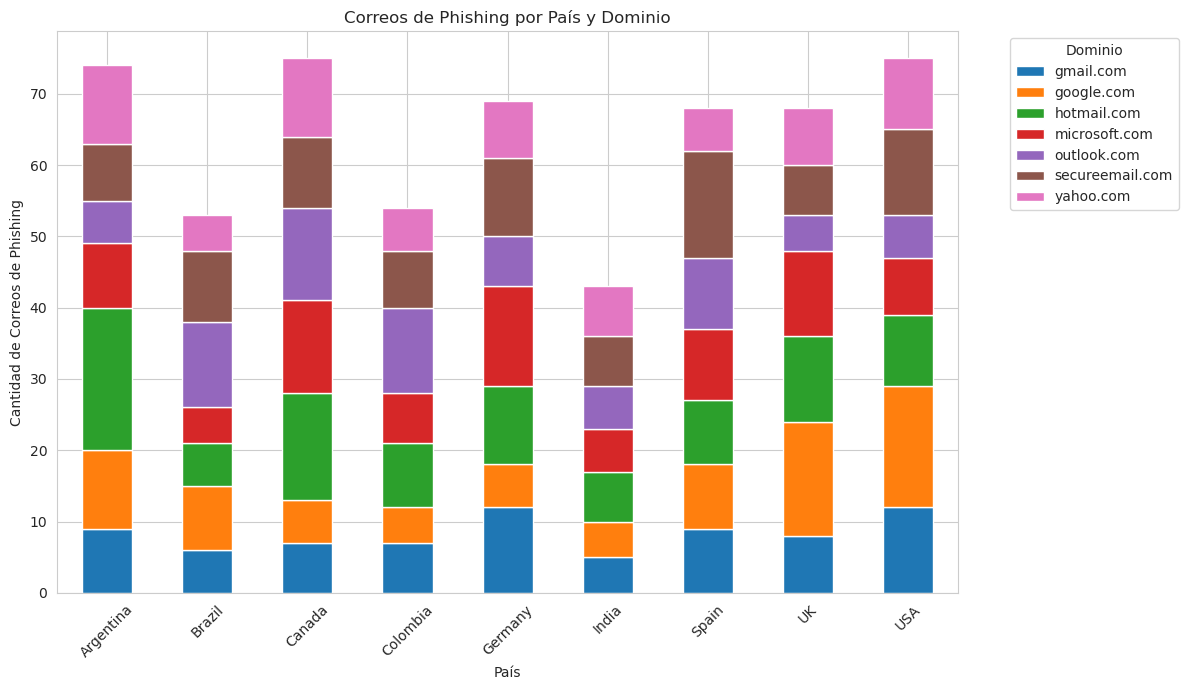

In [23]:
# Filtrar solo los correos de phishing
phishing_emails = df[df['Email Type'] == 'phishing email']

# Agrupar por país y dominio
grouped = phishing_emails.groupby(['Country', 'Email_domain']).size().unstack(fill_value=0)

# Graficar como barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Correos de Phishing por País y Dominio')
plt.xlabel('País')
plt.ylabel('Cantidad de Correos de Phishing')
plt.xticks(rotation=45)
plt.legend(title='Dominio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('6_phishing_stack_bar.png')
plt.show()


**Comentarios:** El análisis de Correos Phishing por País y Dominio ayuda a identificar visualmente los países con mayores riesgos de ataques de phishing y qué dominios están más implicados en esos ataques, lo cual es crucial para comprender las amenazas y fortalecer las medidas de seguridad para proteger a los usuarios de esos países o dominios. En este caso, el país del cual provienen la mayor cantidad de correos de phishing es UK y el dominio más utilizado es yahoo.com



### 7. Línea de Tiempo: Correos Phishing vs Seguros

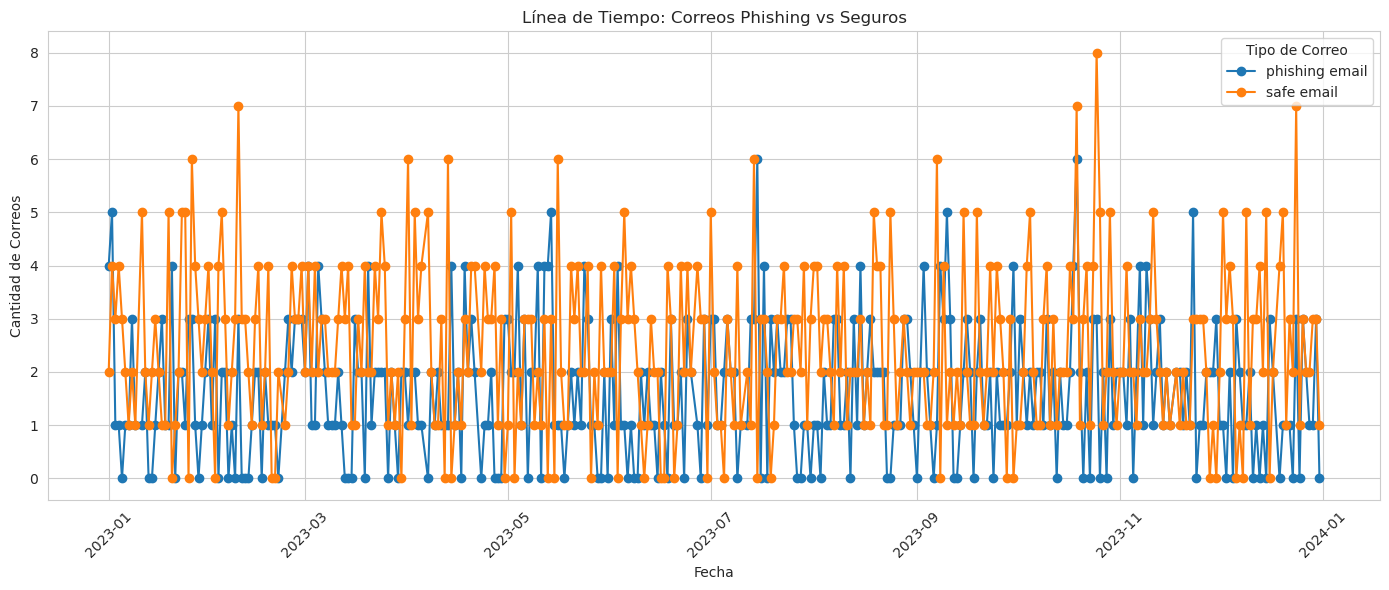

In [24]:
# Asegurar que el timestamp sea datetime
df['timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Crear columna de solo fecha
df['fecha'] = df['timestamp'].dt.date

# Agrupar por fecha y tipo de email
resumen = df.groupby(['fecha', 'Email Type']).size().unstack(fill_value=0)

# Graficar como líneas
resumen.plot(kind='line', figsize=(14, 6), marker='o')

plt.title('Línea de Tiempo: Correos Phishing vs Seguros')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Correos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Tipo de Correo')
plt.savefig('7_timeline_emailphishing_vs_seg.png')
plt.show()


**Comentarios:** En esta gráfica de Línea de Tiempo: Correos Phishing vs Seguros, se puede observar cómo evoluciona la cantidad de correos electrónicos de phishing en comparación con los correos seguros a lo largo del tiempo. Las tendencias observadas ayudan a identificar periodos de alto riesgo o ataques concentrados en momentos específicos. Además, facilita la identificación de patrones recurrentes o emergentes en las amenazas de phishing, lo que podría ayudar a mejorar las estrategias de prevención y seguridad.

## Almacenamiento de registros en Base de Datos Postgres

En el desarrollo de este código, se ha optado por "actualizar" la tabla en cada ejecución, con el objetivo de evitar la duplicación de registros. De esta manera, cada vez que se ejecute el código, se borrarán los registros previos y solo se insertarán los 10 registros solicitados para este parte de la tarea, garantizando que la base de datos no crezca innecesariamente con datos repetidos.

El código desarrollado a continuación está basado en el archivo presentado en clase ejercicio1.py

In [25]:
# Importación de librerías requeridas
import psycopg2
import json
from datetime import datetime

# Paso 1: Crear la base de datos y la tabla desde Python
def create_database_and_table():
    try:
        # Conexión al servidor PostgreSQL (sin especificar una base de datos)
        conn = psycopg2.connect(
            user="postgres", # Usuario predeterminado
            password="postgres",
            host="localhost",
            port="5432"
        )
        conn.autocommit = True # Necesario para crear una base de datos
        cursor = conn.cursor()

        # Crear la base de datos "phishing_data" si no existe
        cursor.execute("SELECT datname FROM pg_database WHERE datname='phishing_data';")
        if not cursor.fetchone():
            cursor.execute("CREATE DATABASE phishing_data;")
            print("Base de datos 'phishing_data' creada correctamente.")
        else:
            print("La base de datos 'phishing_data' ya existe.")

        # Cerrar la conexión inicial
        cursor.close()
        conn.close()

        # Conectar a la nueva base de datos
        conn = psycopg2.connect(
            database="phishing_data",  # Conectar a la base de datos recién creada
            user="postgres",
            password="postgres",
            host="localhost",
            port="5432"
        )
        cursor = conn.cursor()

        # Crear la tabla "email_phishing" si no existe
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS email_phishing (
            id SERIAL PRIMARY KEY,
            email_text TEXT,
            email_type VARCHAR(50),
            timestamp TIMESTAMP,
            ip_origen VARCHAR(15),
            email_domain VARCHAR(100),
            priority_level VARCHAR(20),
            country VARCHAR(50)
        );
        """)
        print("Tabla 'email_phishing' creada correctamente.")

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al crear la base de datos o la tabla: {e}")

# Paso 2: Insertar los 10 primeros registros del DataFrame en la tabla
def insert_dataframe_to_db():
    try:
        # Conectar a la base de datos
        conn = psycopg2.connect(
            database="phishing_data",
            user="postgres",
            password="postgres",
            host="localhost",
            port="5432"
        )
        cursor = conn.cursor()

        # Eliminar los registros anteriores y reiniciar el contador de 'id'
        cursor.execute("TRUNCATE TABLE email_phishing RESTART IDENTITY;")
        conn.commit()
        print("Registros anteriores eliminados y contador de 'id' reiniciado.")

        # Tomamos los primeros 10 registros del DataFrame
        for _, row in df.head(10).iterrows():
            # Insertar cada fila en la tabla
            cursor.execute("""
                INSERT INTO email_phishing (email_text, email_type, timestamp, ip_origen, email_domain, priority_level, country)
                VALUES (%s, %s, %s, %s, %s, %s, %s);
            """, (row['Email Text'], row['Email Type'], pd.to_datetime(row['Timestamp']), row['IP_origen'], row['Email_domain'], row['Priority_level'], row['Country']))

        # Confirmar cambios y cerrar la conexión
        conn.commit()
        print("Primeros 10 registros insertados correctamente.")
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error al insertar datos en la base de datos: {e}")

# Paso 3: Guardar logs no estructurados en un archivo JSON
def save_unstructured_logs():
    try:
        # Crear logs no estructurados usando los primeros 10 registros del DataFrame
        unstructured_logs = []

        for _, row in df.head(10).iterrows():
            log_entry = f"[{row['Timestamp']}] {row['Email Type']} - {row['Email Text']} from IP {row['IP_origen']}"
            unstructured_logs.append(log_entry)

        # Guardar logs no estructurados en un archivo JSON
        with open("unstructured_logs.json", "w") as file:
            json.dump(unstructured_logs, file, indent=4)

        print("Logs no estructurados guardados en 'unstructured_logs.json'")

    except Exception as e:
        print(f"Error al guardar logs no estructurados: {e}")


# Ejecutar todas las funciones
if __name__ == "__main__":
    create_database_and_table()  # Crear base de datos y tabla
    insert_dataframe_to_db()  # Insertar los primeros 10 registros del DataFrame en la tabla
    save_unstructured_logs()  # Guardar logs no estructurados en archivo JSON

La base de datos 'phishing_data' ya existe.
Tabla 'email_phishing' creada correctamente.
Registros anteriores eliminados y contador de 'id' reiniciado.
Primeros 10 registros insertados correctamente.
Logs no estructurados guardados en 'unstructured_logs.json'
